User ID:wesley
Password:········
2.0
2.0
2.0
2.0


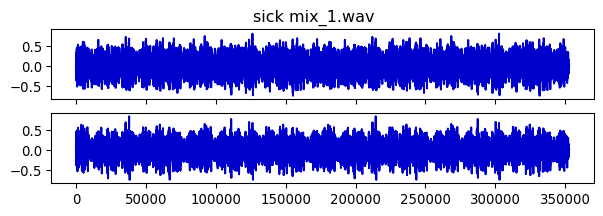

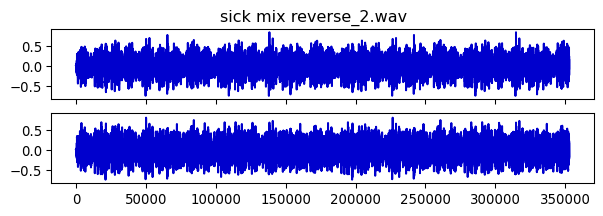

In [1]:
# import library
from music_code import music_code

# initialize
m = music_code.MusicCode(120)

# mysql database
m.connect()


# load samples
kick = m.sample('kick',2).time_edit(1/8)
snare = m.sample('snare',1).time_edit(1/4).vol(2)
hihat1 = m.sample('hihat',3).time_edit(1/8).pan('L25')
hihat2 = m.sample('hihat',1).time_edit(1/8) .pan('R25')

# create rhythmic patterns
kick = m.join_waves((kick, m.rest(1/4),kick, m.rest(1/8), kick, m.rest(1/4)))
snare = m.join_waves((m.rest(1/4), snare)).loop(2)
hihat1 = m.join_waves((m.rest(1/8), hihat1)).loop(4)
hihat2 = m.join_waves((hihat2, m.rest(1/8))).loop(4)

# make sure times match
kick.time()
snare.time()
hihat1.time()
hihat2.time()

# drum mix
drums = m.add_waves((kick, snare, hihat1, hihat2)).loop(4)


sub = m.sequence(['E0'], 'sine', rhythm=1/8, duration=2, fade_in=1/8, fade_out=1/8).LPF(100).vol(3)
bass1 = m.sequence(['E3'], 'square', rhythm=1/8, duration=2, fade_in=1/8, fade_out=1/8, in_curve=5, out_curve=3).vol(3.4)
bass2 = m.sequence(['E2'], 'tri', rhythm=1/8, duration=2, fade_in=1/8, fade_out=1/8).vol(2)
bass3 = m.sequence(['E1'], 'sine', rhythm=1/8, duration=2, fade_in=1/8, fade_out=1/8, wt_pos=9999).vol(2)

bass = m.add_waves((sub, bass1, bass2, bass3)).loop(2)



layer_1 = m.arpeggio('min 7', 'E2', 'sine', rhythm=1/36, duration=2).pan('L20')
layer_2 = m.arpeggio('min 9', 'E3', 'square', rhythm=1/36, duration=2).pan('L50')
layer_3 = m.arpeggio('min 11', 'E3', 'saw1', rhythm=1/36, duration=2).pan('R50')
layer_4 = m.arpeggio('min 7', 'E2', 'tri', rhythm=1/36, duration=2).pan('R20')

stack = m.add_waves((layer_1,layer_2,layer_3,layer_4)).loop(2).vol(.5)



# drum and bass

mix = m.add_waves((drums, bass, stack))

mix.reverse().bounce('sick mix reverse.wav')